In [96]:
import numpy as np
import pandas as pd

In [97]:
import warnings
warnings.filterwarnings('ignore')

Считаем данные в таблицу data. Также сразу добавим столбец listened, который показывает, какая часть трека была прослушана, таким образом поймем если трек был сразу переключен, или же наоборот, полностью прослушан.

In [98]:
data = pd.read_csv('/Users/mitttttechka/Desktop/Яндекс МЛ/music_data.csv')
data['listened'] = (pd.to_datetime(data['utc_audition_end_dttm']) - pd.to_datetime(data['utc_audition_start_dttm'])).dt.total_seconds() / data['track_duration']
data = data.drop('Unnamed: 0', axis = 1)

In [99]:
data

,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm,listened
0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28T12:32:10.776000Z,2021-02-28T12:31:01.865000Z,0.204709
1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19T12:13:43.369000Z,2021-01-19T12:12:48.185000Z,0.128695
2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27T19:53:57.143000Z,2021-02-27T19:52:42.470000Z,0.161118
3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24T01:51:44.526000Z,2021-02-24T01:46:25.549000Z,0.985269
4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24T05:04:32.855000Z,2020-12-24T05:00:09.645000Z,0.830608
...,...,...,...,...,...,...,...,...
842392,45d2ac0d4fe049d387caf17a5243074e,360.581998,POP,7bedf37f-a671-4aa2-bcf9-e2defccbcb8e,e5e46188fe6d41f89faf,2021-02-05T09:17:07.865000Z,2021-02-05T09:11:33.925000Z,0.926114
842393,a0f30ab974e94b19b9be607f4ac55f76,373.243783,RAP,e06f3160-d57e-47f3-be08-33d3c5de26e8,f437ddab36c74c67a42d,2021-02-20T13:31:47.351000Z,2021-02-20T13:31:02.089000Z,0.121267
842394,ae2f051bbfa44cbdaf140ef2124e5e82,574.092229,BLUES,08de5d63-286b-40a2-b609-e7d85218f182,6d1fe5c707a7482a82e6,2021-02-26T17:00:06.380000Z,2021-02-26T16:54:46.656000Z,0.556921
842395,9fda54d3ad6841f0ad78e84c6abdf506,370.237483,POP,0397b6fb-a5fe-4e9c-b50d-ff9cff864bc7,7cb9103d77eb4a899c19,2021-02-25T06:57:20.404000Z,2021-02-25T06:52:09.760000Z,0.839040


Посмотрим на статистику по числовым столбцам наших данных. 

In [100]:
data.describe()

,track_duration,listened
count,842397.000000,842397.000000
mean,651.026261,0.654387
std,900.259585,0.336291
min,240.635442,0.000014
25%,366.486757,0.274943
50%,407.273724,0.806099
75%,465.304148,0.933136
max,4786.285463,1.401005


Из этой статистики можно заметить несколько неожиданных моментов.  
Во-первых, максимальное значение listened больше единицы. Так как изначально данный столбец создавался по формуле: (время окончания прослушивания - время начала прослушивания) / продолжительность трека, объяснением явлется то, что пользователь мог поставить трек на паузу во время прослушивания.  
Во-вторых, среднее значение длительности трека больше 10 минут, а максимальное больше часа, что странно, дальше посмотрим, почему так получилось

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

Построим график с количетсвом прослушанных треков по жанрам

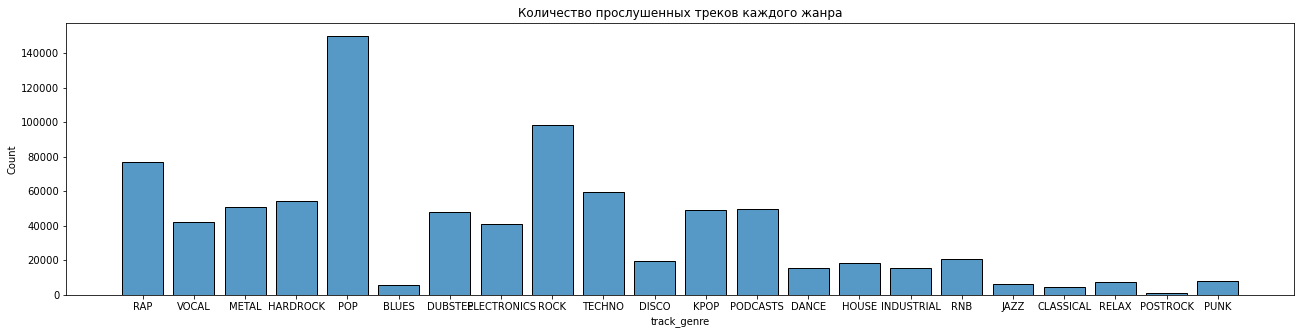

In [102]:
plt.figure(figsize=(22, 5))
sns.histplot(data, x='track_genre', shrink=.8).set_title('Количество прослушенных треков каждого жанра')
plt.show()

Самым популярным жанром оказался Поп, Техно на четвертом месте по популярности, что неплохо.  
Заметим, что все жанры являются музыкальными и дают представление о музыкальных предпочтениях пользователя, за исключением одного - подкастов. Позже посмотрим, как они влияют на нашу выборку. 

Построим график распределения по критерию listened, то есть какая часть трека была прослушана

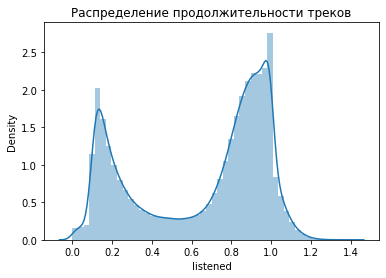

In [103]:
sns_plot = sns.distplot(data['listened']).set_title('Распределение продолжительности треков')
fig = sns_plot.get_figure()

График имеет два локальных максимума в точках близких к нулю и единице, так что можем сделать вывод, что критерий хороший и действительно дает понять, переключил пользователь трек почти сразу или трек ему понравился и был дослушан до конца. 

Построим график распределения по продолжительности треков

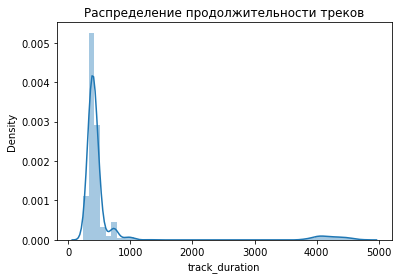

In [104]:
sns_plot = sns.distplot(data['track_duration']).set_title('Распределение продолжительности треков')
fig = sns_plot.get_figure()

Как видно по графику, у большей части треков продолжительность менее 1500 секунд, но есть небольшое количество продолжительностью в районе 4000 секунд, посмотрим что там находится

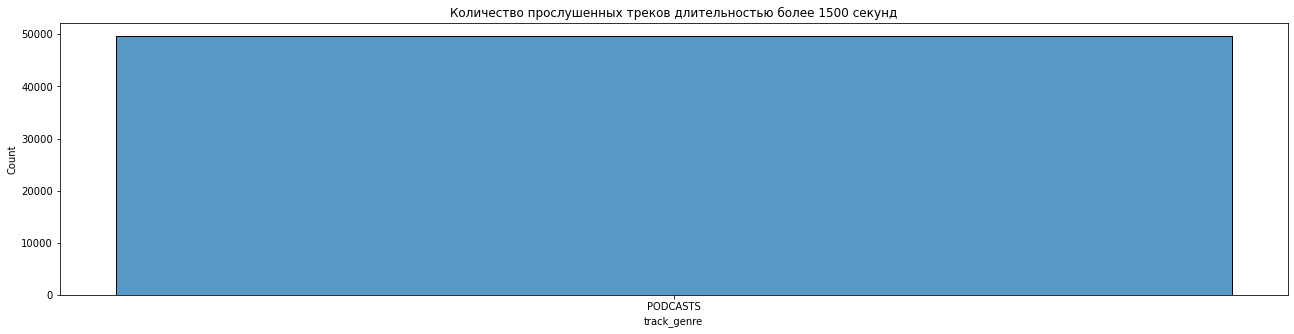

In [105]:
plt.figure(figsize=(22, 5))
sns.histplot(data[data['track_duration'] > 1500], x='track_genre', shrink=.8).set_title('Количество прослушенных треков длительностью более 1500 секунд')
plt.show()

Оказалось, что в логе есть около 50000 записей о прослушиваниях подкастов, которые не являются музыкой, соответственно не дают нам информации о музыкальных предпочтениях пользователя, но при этом сильно портят статистику, так что избавимся от записей о подкастах. 

In [106]:
data = data.loc[data['track_genre'] != 'PODCASTS']

Посмотрим обновленную статистику

In [107]:
data.describe()

,track_duration,listened
count,792731.000000,792731.000000
mean,428.005885,0.654459
std,120.428855,0.336285
min,240.635442,0.000015
25%,363.972186,0.275182
50%,401.451887,0.806102
75%,450.859952,0.933245
max,1393.106121,1.401005


Заметим, что данные значительно улучшились, средняя длина трека уменьшилась почти на 4 минуты, а стандартное отклонение уменьшилось в несколько раз. Перед тем, как перейти к следующему шагу, еще немного поисследуем данные на предмет возможных значительных выбросов. Для этого найдем внешние границы по формуле:  
{ Нижний квартиль - 3 * межквартильный диапозон; Верхний квартиль + 3 * межквартильный диапозон }

In [108]:
Q1 = data.describe().iloc[4]
Q3 = data.describe().iloc[6]
outlier = pd.concat([pd.DataFrame(Q1 - 3*(Q3-Q1)).T, pd.DataFrame(Q3 + 3*(Q3-Q1)).T])
outlier.index = ['bottom bound', 'upper bound']
outlier

,track_duration,listened
bottom bound,103.308887,-1.699007
upper bound,711.523251,2.907434


Значения столбца listened полностью лежат внутри внешних границ, значительных выбросов нет, отлично.  
А в столбце track_duration есть значения, которые больше верхней внешней границы и могут оказаться значительными выбросами. Посмотрим, что это за записи

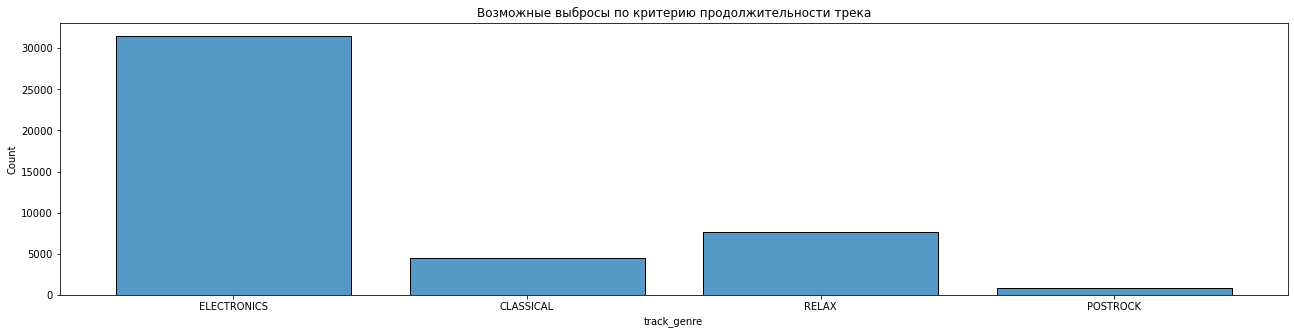

In [109]:
plt.figure(figsize=(22, 5))
sns.histplot(data[data['track_duration'] > 711], x='track_genre', shrink=.8).set_title('Возможные выбросы по критерию продолжительности трека')
plt.show()

Основная часть треков за пределами внешних границ это электронная музыка. Это можно объяснить спецификой жанра, а также большим количеством треков других жанров с меньшей продолжительностью, которые сужают внешние границы. Поэтому я считаю, что можно не считать эти записи выбросами и не избавляться от них

Мы посмотрели начальные данные, теперь можно с ними работать. Следующая часть кода создает таблицу user_stats, подробнее о которой будет написано дальше

In [115]:
genres = pd.get_dummies(data['track_genre'])
genres['user_id'] = data['user_id']
genres = pd.DataFrame(genres.groupby('user_id').sum().sort_values(by = 'TECHNO'))

In [116]:
genres_perc = pd.DataFrame()
for i in genres.columns:
    name = i + '_PERC'
    genres_perc[name] = genres[i] / genres.sum(axis = 1)
genres = pd.concat([genres, genres_perc], axis = 1)

user_stats = pd.concat([data.groupby('user_id').mean(), genres], axis = 1)[['listened', 'TECHNO_PERC']]

user_stats['listened_techno'] = data[data['track_genre'] == 'TECHNO'][['user_id', 'track_genre', 'listened']].groupby('user_id').mean()

data['sec_listened'] = (pd.to_datetime(data['utc_audition_end_dttm']) - pd.to_datetime(data['utc_audition_start_dttm'])).dt.total_seconds()



In [117]:
def position(x):
    pos = 0
    for i in x:
        if i <= x[20]:
            pos += 1
    return pos

genres['techno_pos'] = genres.iloc[:, 21:42].apply(lambda x: position(x), axis =  1)

user_stats = pd.concat([user_stats, genres['techno_pos']], axis = 1)

user_stats['techno_all'] = user_stats['listened_techno']/user_stats['listened']
user_stats.rename(columns={'TECHNO_PERC': 'techno_perc'}, inplace=True)
user_stats['total_hours'] = data.groupby('user_id').sum()['sec_listened']/3600
user_stats['techno_hours'] = data[data['track_genre'] == 'TECHNO'].groupby('user_id').sum()['sec_listened']/3600
user_stats['tracks_count'] = data.groupby('user_id').count()['track_id']
user_stats['techno_count'] = data[data['track_genre'] == 'TECHNO'].groupby('user_id').count()['track_id']
user_stats['unique_tracks_count'] = data.groupby('user_id')['track_id'].nunique()
user_stats['unique_techno_count'] = data[data['track_genre'] == 'TECHNO'].groupby('user_id')['track_id'].nunique()
user_stats['mean_total_play'] = data.groupby('user_id').mean()['sec_listened']
user_stats['mean_techno_play'] = data[data['track_genre'] == 'TECHNO'].groupby('user_id').mean()['sec_listened']
user_stats['techno_all_play'] = user_stats['mean_techno_play'] / user_stats['mean_total_play']
user_stats['techno_play_perc'] = user_stats['techno_hours'] / user_stats['total_hours']
user_stats['variability_all'] = user_stats['unique_tracks_count']/user_stats['tracks_count']
user_stats['variability_techno'] = user_stats['unique_techno_count']/user_stats['techno_count']
cols = ['tracks_count', 'unique_tracks_count', 'techno_count', 'unique_techno_count', 'variability_all', 'variability_techno', 'total_hours', 'techno_hours', 'listened', 'listened_techno', 'techno_all', 'mean_total_play', 'mean_techno_play', 'techno_all_play', 'techno_play_perc', 'techno_perc', 'techno_pos']
user_stats = user_stats[cols]

Посмотрим на получившуюся таблицу

In [118]:
user_stats

,tracks_count,unique_tracks_count,techno_count,unique_techno_count,variability_all,variability_techno,total_hours,techno_hours,listened,listened_techno,techno_all,mean_total_play,mean_techno_play,techno_all_play,techno_play_perc,techno_perc,techno_pos
002123faf66b47b5aafa,324,306,23,22,0.944444,0.956522,25.374741,1.777334,0.672938,0.596631,0.886606,281.941565,278.191391,0.986699,0.070043,0.070988,18
0041383820e248e487a6,1003,890,77,67,0.887338,0.870130,76.138582,6.113066,0.645158,0.611335,0.947574,273.279059,285.805662,1.045838,0.080289,0.076770,13
008005a451764a63aa3f,602,560,43,39,0.930233,0.906977,45.812598,3.500469,0.642139,0.622708,0.969741,273.962379,293.062512,1.069718,0.076408,0.071429,15
00c017dc34254d39a390,596,565,51,51,0.947987,1.000000,48.452803,4.799784,0.679585,0.717884,1.056357,292.667938,338.808275,1.157654,0.099061,0.085570,15
00f628a2f8044ae18d88,379,370,35,34,0.976253,0.971429,29.261964,3.125973,0.654617,0.680341,1.039296,277.950058,321.528686,1.156786,0.106827,0.092348,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff77d34a23c04d36a421,381,354,33,30,0.929134,0.909091,30.346086,2.728713,0.668512,0.629712,0.941960,286.734672,297.677788,1.038165,0.089920,0.086614,13
ff9b606118d449f1ab15,399,378,29,27,0.947368,0.931034,29.554808,2.268441,0.632716,0.594038,0.938870,266.659920,281.599552,1.056025,0.076754,0.072682,14
ffa2421c514844c087f3,591,545,31,31,0.922166,1.000000,45.149530,2.444186,0.647010,0.605157,0.935314,275.022519,283.841000,1.032065,0.054135,0.052453,16
ffa5ecacdcfb466d8e91,513,474,39,33,0.923977,0.846154,38.501059,3.248240,0.637294,0.630976,0.990086,270.182873,299.837538,1.109758,0.084368,0.076023,12


В данной таблице, в отличие от изначально данной, каждая строка это отдельный пользователь и его статистика в общем по прослушиванию музыки, и по прослушиванию жанра техно в частности. Я постарался вывести всю возможную статистику по пользователю, некоторые признаки избыточны и не понадобятся в будущем, они сделаны для удобства и для наглядности. Общая статистика нужна, чтобы в принципе понять пользователя, сколько и как он слушает музыку. Статистика по техно позволяет оценить склонность пользователя к прослушиванию техно в сравнении с типичным поведением. Рассмотрим, какие признаки есть в новой таблице:  
**tracks_count**: Сколько всего треков было прослушано пользователем  
**unique_track_count**: Сколько различных треков было прослушано пользователем  
**techno_count**: Сколько треков жанра техно было прослушано пользователем  
**unique_techno_count**: Сколько различных треков жанра техно было прослушано пользователем  
**variability_all**: Вариативность прослушанных пользователем треков, то есть отношение прослушанных различных треков к общему числу прослушиваний  
**variability_techno**: Вариативность треков жанра техно  
**total_hours**: Сколько всего времени пользователь слушал музыку (в часах)  
**techno_hours**: Сколько всего времени пользователь слушал техно (в часах)  
**listened**: Какую часть трека в среднем прослушивает пользователь  
**listened_techno**: Какую часть трека жанра техно в среднем прослушивает пользователь  
**techno_all**: Отношение listened_techno к listened, позволяет определить склонность к прослушиванию техно по отношению к среднему поведению при прослушивании  
**mean_total_play**: Сколько по времени пользователь в среднем слушает трек (в секундах)  
**mean_techno_play**: Сколько по времени пользователь в среднем слушает трек жанра техно (в секундах)  
**techno_all_play**: Отношение mean_techno_play к mean_total_play, позволяет определить склонность к прослушиванию техно по отношению к среднему поведению при прослушивании. Отличие от listened в том, что не учитывается средняя продолжительность трека в среднем по жанрам и для техно.   
**techno_play_perc**: Какую часть времени из общего времени прослушивания занимают треки техно  
**techno_perc**: Какая часть треков из прослушанных пользователем (по количеству) жанра техно    
**techno_pos**: На каком месте по популярности жанр техно среди других (21-самое высокое - 1-самое низкое)  

Посмтрим на статистику по каждому столбцу. 

In [119]:
user_stats.describe()

,tracks_count,unique_tracks_count,techno_count,unique_techno_count,variability_all,variability_techno,total_hours,techno_hours,listened,listened_techno,techno_all,mean_total_play,mean_techno_play,techno_all_play,techno_play_perc,techno_perc,techno_pos
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,459.022003,434.071801,34.442386,32.596989,0.949750,0.951285,35.710348,2.942152,0.654670,0.653894,0.998881,280.191504,306.994852,1.095927,0.082359,0.075162,13.767805
std,134.940395,121.741508,11.485847,10.477740,0.017164,0.038955,10.501646,1.028142,0.016662,0.064957,0.096721,8.394012,30.530703,0.106717,0.016351,0.013211,1.748678
min,66.000000,64.000000,3.000000,3.000000,0.887338,0.800000,5.388236,0.070822,0.592885,0.183473,0.280593,245.189469,84.986667,0.289165,0.013144,0.034946,8.000000
25%,371.000000,354.000000,26.000000,25.000000,0.938132,0.925000,28.906495,2.209635,0.643625,0.613627,0.939045,274.726402,287.534823,1.027981,0.071485,0.066496,12.000000
50%,456.000000,434.000000,34.000000,32.000000,0.949875,0.955556,35.472259,2.893108,0.654854,0.655536,1.000371,280.160304,307.719765,1.097722,0.081886,0.074675,13.000000
75%,549.000000,515.000000,42.000000,40.000000,0.961648,0.978261,42.654828,3.570955,0.665484,0.695083,1.059282,285.674666,326.620688,1.163060,0.091641,0.083117,15.000000
max,1003.000000,890.000000,77.000000,67.000000,1.000000,1.000000,76.138582,6.379429,0.712990,0.971364,1.482093,307.525429,458.180875,1.602810,0.152903,0.128821,19.000000


Нашей задачей является формирование выборки для рассылки, соответственно необходимо из всех пользователей выбрать тех, кто с большей вероятностью купит билет на фестиваль. Посмотрим на признаки по которым можно сравнить поведение пользователя при прослушивании любого трека и трека жанра техно. 

Построим на график со средней продолжительностью прослушивания любого трека пользователем и трека жанра техно. Оранжевым цветом выделим тех пользователей, которые в среднем слушают трек жанра техно дольше, чем остальные треки

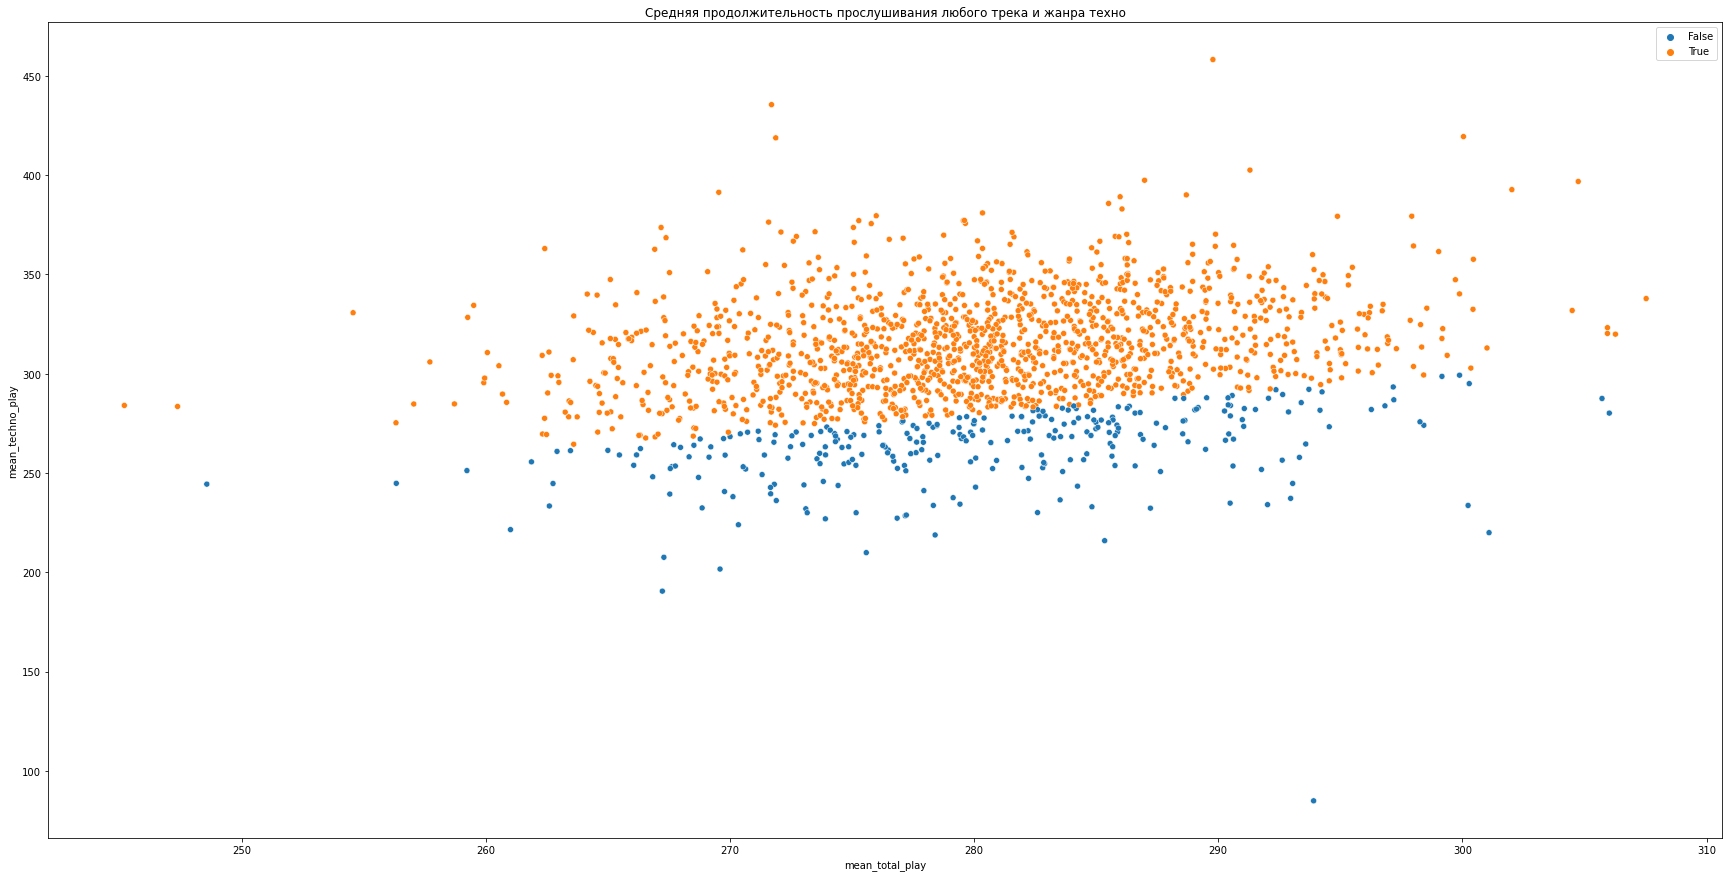

In [120]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x=user_stats['mean_total_play'], y=user_stats['mean_techno_play'], hue = (user_stats['mean_techno_play'] > user_stats['mean_total_play'])).set_title('Средняя продолжительность прослушивания любого трека и жанра техно')

plt.show()

Заметим, что большинство пользователей слушают треки жанра техно в среднем дольше, чем остальные. Однако, возможно, это не очень репрезантивный признак, так как, как мы видели раньше, треки жанра техно в принципе в среднем длятся дольше.

Построим график по столбцам listened и listened_techno, который по логике похож на предыдущий, однако значения измеряются не в прослушанных секундах, а в прослушенной части треков, то есть нет зависимости от продолжительности трека. Также выделим рыжим цветом тех, у кого данный признак для жанра техно выше, чем в среднем

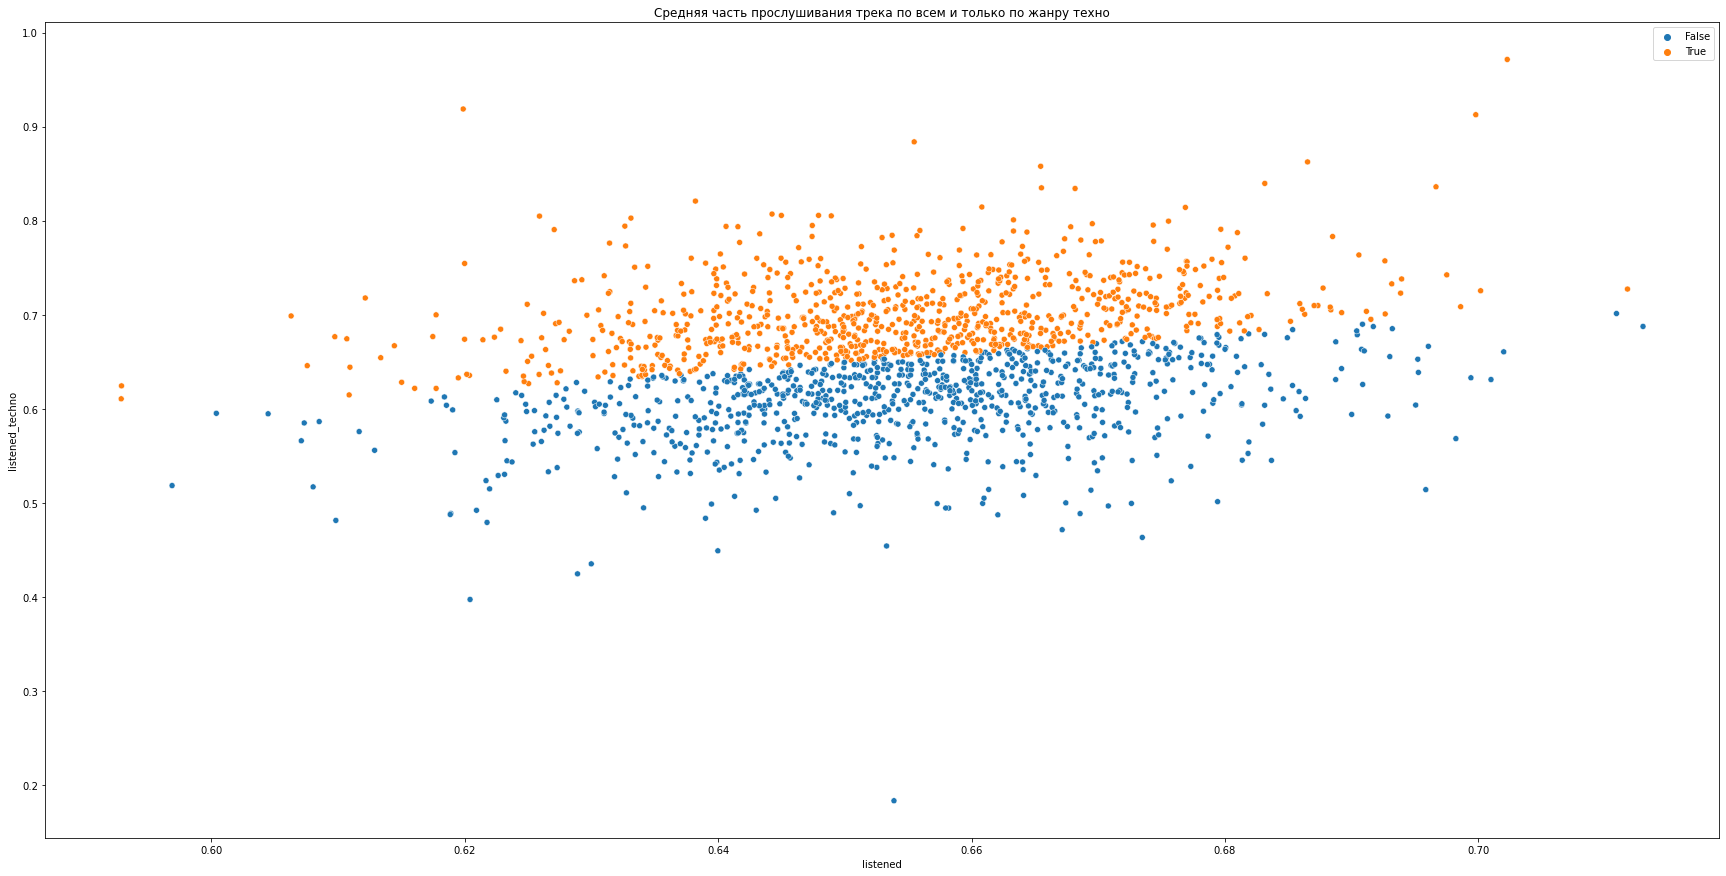

In [121]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x=user_stats['listened'], y=user_stats['listened_techno'], hue = (user_stats['listened_techno'] > user_stats['listened'])).set_title('Средняя часть прослушивания трека по всем и только по жанру техно')
plt.show()

Как видим, по данному признаку пользователи уже поделились примерно пополам.

Построим график такой же график для показателя вариативности 

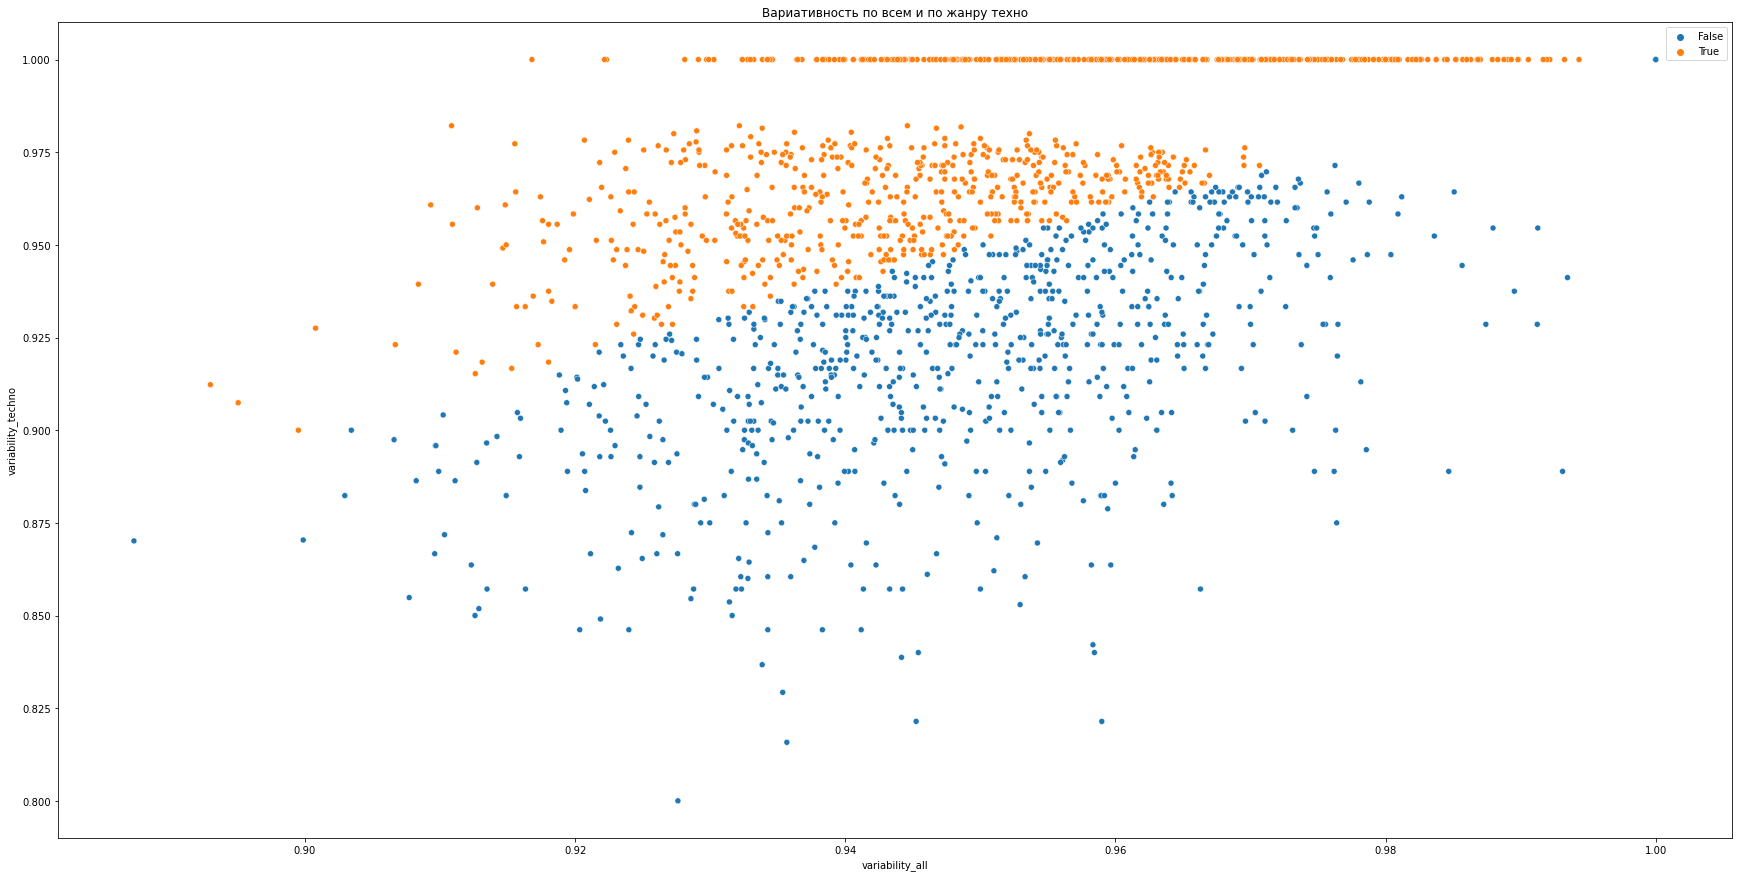

In [122]:
plt.figure(figsize=(30, 15))
sns.scatterplot(x=user_stats['variability_all'], y=user_stats['variability_techno'], hue = (user_stats['variability_techno'] > user_stats['variability_all'])).set_title('Вариативность по всем и по жанру техно')
plt.show()

Показатель вариативности дает нам понять, если пользателю нравится какой-то один трек и он часто его слушает, или же пользователю нравится жанр в целом и он слушает различные треки данного жанра

Порассуждаем, какие пользователи могут войти в нашу выборку.  
Основным предположением, от которого я отталкиваюсь, является то, что пользователю нравится жанр, если показатели для него выше, чем в среднем для всех треков. И чем сильнее значения признака для конкретного жанра отличаются от среднего значения, тем больше или меньше нравится пользователю этот жанр.  
В нашу выборку включим только тех пользователей, которым нравится жанр техно, то есть средние значения по сравнимым признакам для жанра выше, чем в среднем для пользователя. Мы не можем говорить о конкретных значениях для каждого признака, так как поведения пользователей разные, поэтому имеет смысл сравнивать их только самих с собой, собственно поэтому сравниваем значения для жанра техно со средним по всем для пользователя.   
Необходимо выбрать, какие критерии будем использовать для отбора. Выше мы рассмотрели три признака, по которым можно провести сравнения по пользователю. Как я уже написал выше, среднюю продолжительность прослушивания не очень хорошо сравнивать между собой для разных жанров, так как для каждого жанра характерна своя продолжительность. Как мне кажется, лучше сравнивать по тому, какую часть трека прослушал пользователь. Поэтому первым критерием для отбора будет отсеивание тех, кто в жанре техно в среднем слушает меньшую часть трека, чем по остальным жанрам, то есть в выборку берем тех, у кого значение listened_techno > listened.   
Еще одним сравнивым критерием была вариативность. Я отталкиваюсь от того, чем выше этот показатель, тем более разнообразную музыку одного жанра слушает пользователь, тем сильнее пользователю нравится именно жанр, а не какая-то одна песня. Так как человек вряд ли пойдет на фестиваль ради только одной или нескольких песен, этот показатель может помочь. Однако, так как на этот показатель может повлиять то, что пользователь часто переключает треки, тем самым искуственно завышая показатель вариативности, немного сдвинем порог отбора. Включим в выборку пользователей по признаку: variability_techno > variability_all - 0.05  
Получим выборку:

In [123]:
to_send = user_stats[(user_stats['listened_techno'] > user_stats['listened']) & (user_stats['variability_techno'] > user_stats['variability_all'] - 0.05)]
keys = to_send.index
to_send

,tracks_count,unique_tracks_count,techno_count,unique_techno_count,variability_all,variability_techno,total_hours,techno_hours,listened,listened_techno,techno_all,mean_total_play,mean_techno_play,techno_all_play,techno_play_perc,techno_perc,techno_pos
00c017dc34254d39a390,596,565,51,51,0.947987,1.000000,48.452803,4.799784,0.679585,0.717884,1.056357,292.667938,338.808275,1.157654,0.099061,0.085570,15
00f628a2f8044ae18d88,379,370,35,34,0.976253,0.971429,29.261964,3.125973,0.654617,0.680341,1.039296,277.950058,321.528686,1.156786,0.106827,0.092348,13
01cc4049e5b14fbe946b,581,543,42,42,0.934596,1.000000,45.502903,3.627333,0.664506,0.668052,1.005335,281.945699,310.914286,1.102745,0.079717,0.072289,13
0281c2d5ce1c4b9aaada,405,383,35,34,0.945679,0.971429,30.739082,3.459176,0.637872,0.760160,1.191712,273.236281,355.800971,1.302173,0.112533,0.086420,13
02d75cc5a5ac45eeb978,529,491,37,36,0.928166,0.972973,40.792988,3.293577,0.651934,0.694780,1.065721,277.608238,320.456189,1.154347,0.080739,0.069943,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd1a2f3e9f1f4e1488ac,323,313,18,18,0.969040,1.000000,25.123191,1.736531,0.669349,0.741512,1.107809,280.010796,347.306278,1.240332,0.069121,0.055728,14
fd7a520bcda845caa558,781,714,59,53,0.914213,0.898305,65.177267,5.448357,0.687032,0.709767,1.033092,300.432985,332.442102,1.106543,0.083593,0.075544,12
fdd35237fd6e4c3ab8a7,616,590,41,39,0.957792,0.951220,47.905339,3.530189,0.653275,0.660690,1.011350,279.966268,309.967854,1.107161,0.073691,0.066558,16
ff457d71e1c9414e92b5,394,379,27,26,0.961929,0.962963,30.435929,2.512654,0.660138,0.706218,1.069803,278.094784,335.020593,1.204699,0.082556,0.068528,16


В нашей выборке для рассылки осталось 796 человек. Однако будет еще лучше, если мы расположим их в порядке предрасположенности к жанру техно. Для этого постараемся дать оценку каждому пользователю, насколько он любит жанр техно. 

Формулу для оценки я составил исходя из того, что каждый признак, относящийся к сравнению жанра техно с остальными одинаково важен. Это признаки: **techno_all, techno_all_play, techno_pos, variability_techno/variability_all**. 
Также мне кажется важным, сколько в принципе человек слушает музыку в абсолютном значении, так как если пользователь слушает очень мало музыки, то вряд ли он большой фанат и захочет пойти на фестиваль. Однако я сделал эту зависимость не линейной, а квадратичной, так как более важно, если человек совсем не слушает музыку, чем если он слушает ее очень много.  
Итоговая формула оценки: **score = techno_all * techno_all_play * techno_pos * variability_techno/variability_all *  total_hours^0.5**  
Все значения сначала масштабируются, чтобы вносить одинаковый вклад в итоговую оценку

In [124]:
to_send['variability'] = to_send['variability_techno']/to_send['variability_all']
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
to_send = pd.DataFrame(normalizer.fit_transform(to_send), columns = to_send.columns)
to_send['score'] = to_send['techno_all'] * to_send['techno_all_play'] * to_send['techno_pos'] * to_send['variability'] * (to_send['total_hours'] ** 0.5)
to_send.index = keys

In [125]:
to_send

,tracks_count,unique_tracks_count,techno_count,unique_techno_count,variability_all,variability_techno,total_hours,techno_hours,listened,listened_techno,techno_all,mean_total_play,mean_techno_play,techno_all_play,techno_play_perc,techno_perc,techno_pos,variability,score
00c017dc34254d39a390,0.643890,0.668605,0.686567,0.779661,0.504378,1.000000,0.653236,0.730944,0.729308,0.297256,0.146822,0.761655,0.316478,0.207229,0.527544,0.539274,0.555556,0.749152,0.010235
00f628a2f8044ae18d88,0.358739,0.385174,0.447761,0.491525,0.773724,0.785714,0.340012,0.445848,0.519279,0.193171,0.102284,0.525549,0.217536,0.205603,0.595690,0.611475,0.333333,0.331007,0.001353
01cc4049e5b14fbe946b,0.624179,0.636628,0.552239,0.627119,0.376778,1.000000,0.605089,0.531243,0.602470,0.159102,0.013626,0.589647,0.156758,0.104437,0.357799,0.397795,0.333333,0.854820,0.000315
0281c2d5ce1c4b9aaada,0.392904,0.404070,0.447761,0.491525,0.482390,0.785714,0.364121,0.502602,0.378429,0.414462,0.500181,0.449930,0.413777,0.477774,0.645762,0.548321,0.333333,0.555922,0.026722
02d75cc5a5ac45eeb978,0.555848,0.561047,0.477612,0.525424,0.315516,0.797297,0.528216,0.474396,0.496714,0.233203,0.171270,0.520065,0.211395,0.201037,0.366769,0.372806,0.444444,0.703059,0.007819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd1a2f3e9f1f4e1488ac,0.285151,0.302326,0.194030,0.220339,0.704993,1.000000,0.272461,0.209189,0.643209,0.362761,0.281145,0.558607,0.365137,0.362004,0.264822,0.221373,0.444444,0.588922,0.013905
fd7a520bcda845caa558,0.886991,0.885174,0.805970,0.813559,0.182554,0.237288,0.926205,0.841413,0.791954,0.274753,0.086087,0.886222,0.280025,0.111547,0.391814,0.432469,0.222222,0.243908,0.000501
fdd35237fd6e4c3ab8a7,0.670171,0.704942,0.537313,0.576271,0.597813,0.634146,0.644301,0.514697,0.507993,0.138691,0.029328,0.557893,0.151339,0.112704,0.304926,0.336749,0.666667,0.317581,0.000562
ff457d71e1c9414e92b5,0.378449,0.398256,0.328358,0.355932,0.637231,0.722222,0.359173,0.341383,0.565725,0.264913,0.181925,0.527871,0.294790,0.295299,0.382711,0.357729,0.666667,0.373073,0.008008


Посмотрим на статистику столбца score

In [126]:
to_send['score'].describe()

count    796.000000
mean       0.006914
std        0.011912
min        0.000000
25%        0.000624
50%        0.002546
75%        0.007972
max        0.117584
Name: score, dtype: float64

Хоть значения малы и неинтерпретируемы, нам важны не сами значения, а то, как они упорядочивают выборку, как и в задаче ранжирования в машинном обучении. 

Посмотрим распределение количества пользователей в зависимости от оценки:

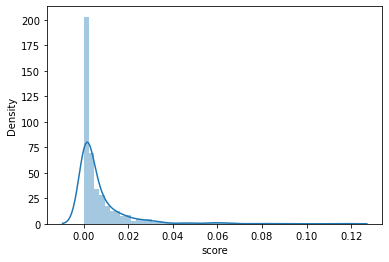

In [127]:
import seaborn as sns
sns_plot = sns.distplot(to_send['score'])
fig = sns_plot.get_figure()

Как видим, получилась убывающая функция, что понятно, так как чем больше значение, чем больше уверенность в том, что пользователю нравится жанр техно, и с возрастанием уверенности, количество таких пользователей уменьшается

Итоговая упорядоченная выборка:

In [128]:
pd.DataFrame(to_send.sort_values(by = 'score', ascending = False)['score'])

,score
aa770bfbbd544ef4948a,0.117584
d52a847f86074f238ce2,0.091476
c7ad39e16a03419caff5,0.083391
87e312bb59b94fb3a5a5,0.076482
e42ac9f100a34c9dba45,0.066684
...,...
b0b15034745943f6b958,0.000000
e557239d772d45429b56,0.000000
471688762eb24ddd88c2,0.000000
4502420f68ad4fcf8c17,0.000000


Такая упорядоченная выборка может быть полезна в условиях задачи, так как необходимо достигнуть очень высокого показателя конверсии, мы хотим отправить как можно меньше лишних писем, чтобы не тратить ограниченный бюджет.  
Если еще достаточно времени до фестиваля, мы можем разделить выборку на несколько групп по, например, 100 человек, не перемешивая их и отправлять рассылку по порядку этим группам. Сначала первой группе, где самые высокие показатели оценки. Затем смотрим на показатель конверсии по этой группе. Если он выше того, что нас устравивает, отправляем письма следующей группе, а если нет, то нет смысла отправлять следующие письма, так как следующая группа менее склонна к жанру техно, а значит, скорее всего, показатель конверсии будет еще ниже. Таким образом мы можем не потратить бюджет, привлекая пользователей себе в убыток.  
Еще одним из вариантов решения этой задачи может быть разделение клиентов также на несколько групп полностью рандомно. Отправить письма одной-двум группам, получить результаты по каждому пользователю, купил он билет или нет, а затем использовать эти данные как задачу машинного обучения и построить модель, которая решает задачу бинарной классификации. Однако данных пары групп слишком мало для построения хорошей модели, а для сбора большого количества данных придется потратить весь бюджет:(